In [1]:
#Importing packages
import os
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import calendar
from datetime import datetime
import warnings
# from statsmodels.tsa.statespace.varmax import VARMAX
# from sklearn.model_selection import TimeSeriesSplit
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.stattools import adfuller

In [2]:
# Get the directory of the current file
current_file = os.path.abspath('__file__')

# Get the path until the "archive" folder
archive_dir = os.path.dirname(current_file)

# Specify the subfolder name
subfolder = "NIFTY_data"

# Create the complete path to the subfolder
subfolder_path = os.path.join(os.path.abspath(archive_dir), subfolder)
subfolder_path

'd:\\SRH\\STUDY\\Projects\\Kannu Cheta\\archive\\NIFTY_data'

In [3]:
# Accessing the files within the subfolder
for dirname, _, filenames in os.walk(subfolder_path):
    for filename in filenames:
        if filename.endswith('.csv'):  # Check if the file is a CSV file
            print(filename)

2021_NIFTY_F1.csv
2021_NIFTY_F1_try.csv
NIFTY_2008.csv
NIFTY_2008_2020.csv
NIFTY_2009.csv
NIFTY_2010.csv
NIFTY_2011.csv
NIFTY_2012.csv
NIFTY_2013.csv
NIFTY_2014.csv
NIFTY_2015.csv
NIFTY_2016.csv
NIFTY_2017.csv
NIFTY_2018.csv
NIFTY_2019.csv
NIFTY_2020.csv
trade_volume.csv
Trial.csv


In [4]:
#Selecting the required csv file
csv_file = os.path.join(subfolder_path, '2021_NIFTY_F1.csv')
date_format = '%Y-%m-%d %H:%M:%S'  # Adjust this format to match the CSV file

# csv_file = os.path.join(subfolder_path, 'Trial.csv')
df_raw = pd.read_csv(csv_file, parse_dates={'DateTime': ['Date ', 'Time']})
# df_raw = pd.read_csv(csv_file)
df_raw

,DateTime,Unnamed: 0,Ticker,Open,High,Low,Close,Volume,Open Interest
0,2021-01-01 09:16:00,0,NIFTY_F1,14002.1,14032.0,13997.0,14026.8,112275,11800650
1,2021-01-01 09:17:00,1,NIFTY_F1,14026.5,14030.0,14021.0,14021.0,58500,11800650
2,2021-01-01 09:18:00,2,NIFTY_F1,14021.0,14025.3,14019.1,14025.0,50625,11892750
3,2021-01-01 09:19:00,3,NIFTY_F1,14026.0,14030.0,14025.7,14029.8,41775,11892750
4,2021-01-01 09:20:00,4,NIFTY_F1,14029.0,14029.3,14023.3,14028.8,24300,11892750
...,...,...,...,...,...,...,...,...,...
92345,2021-12-31 15:26:00,92345,NIFTY_F1,17413.0,17414.4,17409.3,17412.9,70300,10617950
92346,2021-12-31 15:27:00,92346,NIFTY_F1,17412.9,17414.9,17410.8,17413.7,42500,10617950
92347,2021-12-31 15:28:00,92347,NIFTY_F1,17413.6,17415.0,17412.1,17412.1,91500,10562750
92348,2021-12-31 15:29:00,92348,NIFTY_F1,17412.4,17415.0,17411.0,17414.5,106050,10562750


In [5]:
df_raw.describe()       # Checking statistical measures - The standard deviation, IQR, lower bound and upper bound is more or less same among all the features.

,DateTime,Unnamed: 0,Open,High,Low,Close,Volume,Open Interest
count,92350,92350.000000,92350.000000,92350.000000,92350.000000,92350.000000,92350.000000,9.235000e+04
mean,2021-07-03 18:15:04.660963584,46174.500000,16042.279374,16046.413724,16038.154870,16042.286173,24312.434759,1.097148e+07
min,2021-01-01 09:16:00,0.000000,13675.300000,13685.800000,13666.600000,13672.800000,100.000000,0.000000e+00
25%,2021-04-05 10:22:15,23087.250000,14883.000000,14888.000000,14878.700000,14883.200000,8700.000000,9.963350e+06
50%,2021-07-02 13:54:30,46174.500000,15797.800000,15800.000000,15795.100000,15797.800000,15750.000000,1.114019e+07
75%,2021-10-01 11:53:45,69261.750000,17311.200000,17315.550000,17306.300000,17311.200000,29600.000000,1.229115e+07
max,2021-12-31 15:30:00,92349.000000,18589.000000,18594.000000,18585.100000,18590.000000,703950.000000,1.573140e+07
std,NaN,26659.293017,1277.971626,1277.891332,1278.046551,1277.965697,27920.597514,2.164144e+06


In [6]:
#Renaming the column 'Low' and dropping 'Ticker' column
df_raw.rename({'Low ': 'Low'}, axis=1, inplace=True)
df_raw.rename({'Open Interest': 'Open_Interest'}, axis=1, inplace=True)
df_raw.drop(['Ticker', 'Unnamed: 0'], axis = 1, inplace = True)
df_raw

,DateTime,Open,High,Low,Close,Volume,Open_Interest
0,2021-01-01 09:16:00,14002.1,14032.0,13997.0,14026.8,112275,11800650
1,2021-01-01 09:17:00,14026.5,14030.0,14021.0,14021.0,58500,11800650
2,2021-01-01 09:18:00,14021.0,14025.3,14019.1,14025.0,50625,11892750
3,2021-01-01 09:19:00,14026.0,14030.0,14025.7,14029.8,41775,11892750
4,2021-01-01 09:20:00,14029.0,14029.3,14023.3,14028.8,24300,11892750
...,...,...,...,...,...,...,...
92345,2021-12-31 15:26:00,17413.0,17414.4,17409.3,17412.9,70300,10617950
92346,2021-12-31 15:27:00,17412.9,17414.9,17410.8,17413.7,42500,10617950
92347,2021-12-31 15:28:00,17413.6,17415.0,17412.1,17412.1,91500,10562750
92348,2021-12-31 15:29:00,17412.4,17415.0,17411.0,17414.5,106050,10562750


In [7]:
### Converting DateTime column to desired format
df_raw['DateTime'] = df_raw['DateTime'].dt.strftime('%d-%m-%Y %H:%M:%S')
# df_raw['DateTime'] = pd.to_datetime(df_raw['DateTime'])
df_raw = df_raw.set_index('DateTime')
df_raw


,Open,High,Low,Close,Volume,Open_Interest
DateTime,,,,,,
01-01-2021 09:16:00,14002.1,14032.0,13997.0,14026.8,112275,11800650
01-01-2021 09:17:00,14026.5,14030.0,14021.0,14021.0,58500,11800650
01-01-2021 09:18:00,14021.0,14025.3,14019.1,14025.0,50625,11892750
01-01-2021 09:19:00,14026.0,14030.0,14025.7,14029.8,41775,11892750
01-01-2021 09:20:00,14029.0,14029.3,14023.3,14028.8,24300,11892750
...,...,...,...,...,...,...
31-12-2021 15:26:00,17413.0,17414.4,17409.3,17412.9,70300,10617950
31-12-2021 15:27:00,17412.9,17414.9,17410.8,17413.7,42500,10617950
31-12-2021 15:28:00,17413.6,17415.0,17412.1,17412.1,91500,10562750


In [8]:
df_raw.index

Index(['01-01-2021 09:16:00', '01-01-2021 09:17:00', '01-01-2021 09:18:00',
       '01-01-2021 09:19:00', '01-01-2021 09:20:00', '01-01-2021 09:21:00',
       '01-01-2021 09:22:00', '01-01-2021 09:23:00', '01-01-2021 09:24:00',
       '01-01-2021 09:25:00',
       ...
       '31-12-2021 15:21:00', '31-12-2021 15:22:00', '31-12-2021 15:23:00',
       '31-12-2021 15:24:00', '31-12-2021 15:25:00', '31-12-2021 15:26:00',
       '31-12-2021 15:27:00', '31-12-2021 15:28:00', '31-12-2021 15:29:00',
       '31-12-2021 15:30:00'],
      dtype='object', name='DateTime', length=92350)

In [9]:
# Convert the 'DateTime' column to datetime format
df_raw.index = pd.to_datetime(df_raw.index, format='%d-%m-%Y %H:%M:%S')

# Format the datetime objects into the desired string format
df_raw.index = df_raw.index.strftime('%d%b%Y %H:%M:%S')

df_raw

,Open,High,Low,Close,Volume,Open_Interest
DateTime,,,,,,
01Jan2021 09:16:00,14002.1,14032.0,13997.0,14026.8,112275,11800650
01Jan2021 09:17:00,14026.5,14030.0,14021.0,14021.0,58500,11800650
01Jan2021 09:18:00,14021.0,14025.3,14019.1,14025.0,50625,11892750
01Jan2021 09:19:00,14026.0,14030.0,14025.7,14029.8,41775,11892750
01Jan2021 09:20:00,14029.0,14029.3,14023.3,14028.8,24300,11892750
...,...,...,...,...,...,...
31Dec2021 15:26:00,17413.0,17414.4,17409.3,17412.9,70300,10617950
31Dec2021 15:27:00,17412.9,17414.9,17410.8,17413.7,42500,10617950
31Dec2021 15:28:00,17413.6,17415.0,17412.1,17412.1,91500,10562750


In [10]:
df_raw.index = pd.to_datetime(df_raw.index)

# Extract month, day of the week, hour, and minutes
df_raw['Month'] = df_raw.index.strftime('%m')
df_raw['Month Name'] = df_raw.index.strftime('%b')
# df_raw['Week'] = df_raw.index.strftime('%U')
df_raw['Day of Week'] = df_raw.index.strftime('%w')
df_raw['Weekday'] = df_raw.index.strftime('%A')
df_raw['Hour'] = df_raw.index.strftime('%H')
df_raw['Minutes'] = df_raw.index.strftime('%M')
# df_raw['Week'] = df_raw.index.week
# df_raw['Week'] = df_raw.index.dt.isocalendar().week
df_raw['Week'] = df_raw.index.strftime('%W').astype(int) + 1

df_raw

,Open,High,Low,Close,Volume,Open_Interest,Month,Month Name,Day of Week,Weekday,Hour,Minutes,Week
DateTime,,,,,,,,,,,,,
2021-01-01 09:16:00,14002.1,14032.0,13997.0,14026.8,112275,11800650,01,Jan,5,Friday,09,16,1
2021-01-01 09:17:00,14026.5,14030.0,14021.0,14021.0,58500,11800650,01,Jan,5,Friday,09,17,1
2021-01-01 09:18:00,14021.0,14025.3,14019.1,14025.0,50625,11892750,01,Jan,5,Friday,09,18,1
2021-01-01 09:19:00,14026.0,14030.0,14025.7,14029.8,41775,11892750,01,Jan,5,Friday,09,19,1
2021-01-01 09:20:00,14029.0,14029.3,14023.3,14028.8,24300,11892750,01,Jan,5,Friday,09,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 15:26:00,17413.0,17414.4,17409.3,17412.9,70300,10617950,12,Dec,5,Friday,15,26,53
2021-12-31 15:27:00,17412.9,17414.9,17410.8,17413.7,42500,10617950,12,Dec,5,Friday,15,27,53
2021-12-31 15:28:00,17413.6,17415.0,17412.1,17412.1,91500,10562750,12,Dec,5,Friday,15,28,53


In [11]:
#Checking for null values
df_raw.isnull().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
Open_Interest    0
Month            0
Month Name       0
Day of Week      0
Weekday          0
Hour             0
Minutes          0
Week             0
dtype: int64

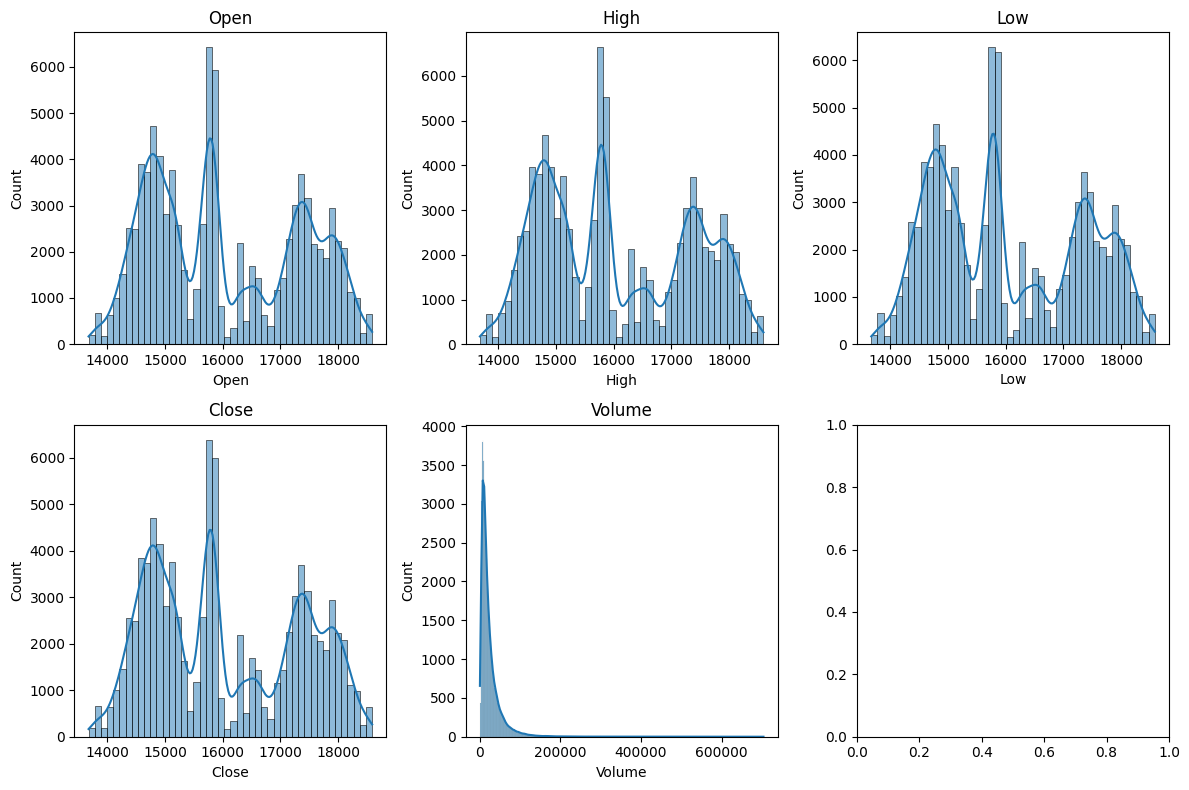

In [12]:
# Create a subset DataFrame containing only the columns of interest
subset_df = df_raw[['Open', 'High', 'Low', 'Close', 'Volume']]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

# Iterate over each column and create a distribution plot
for i, column in enumerate(subset_df.columns):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sns.histplot(data=subset_df, x=column, kde=True, ax=axes[i])
        axes[i].set_title(column)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

### These distribution plots indicate a central tendency i.e. the mean, median are likely to be close to each other. Open, High, Low and Close prices tend to cluster around
### similar values and are consistent with each other. Also indicates consistent price movements across different time periods and spread or range of values of the 
### features is comparable. The plots indicate a potential corelation between the open, high, low and close prices. Volume distribution plot shows a right skewed distribution 
### meaning mean > median. 
### In the context of the 'Volume', distplot suggests that most of the observed volumes tend to be relatively low meaning a normal trading activity, while a few instances exhibit 
### exceptionally high volumes. This could be due to some major market fluctuations or news impacting the market that attracted higher participation which can result in high price
# movements.   

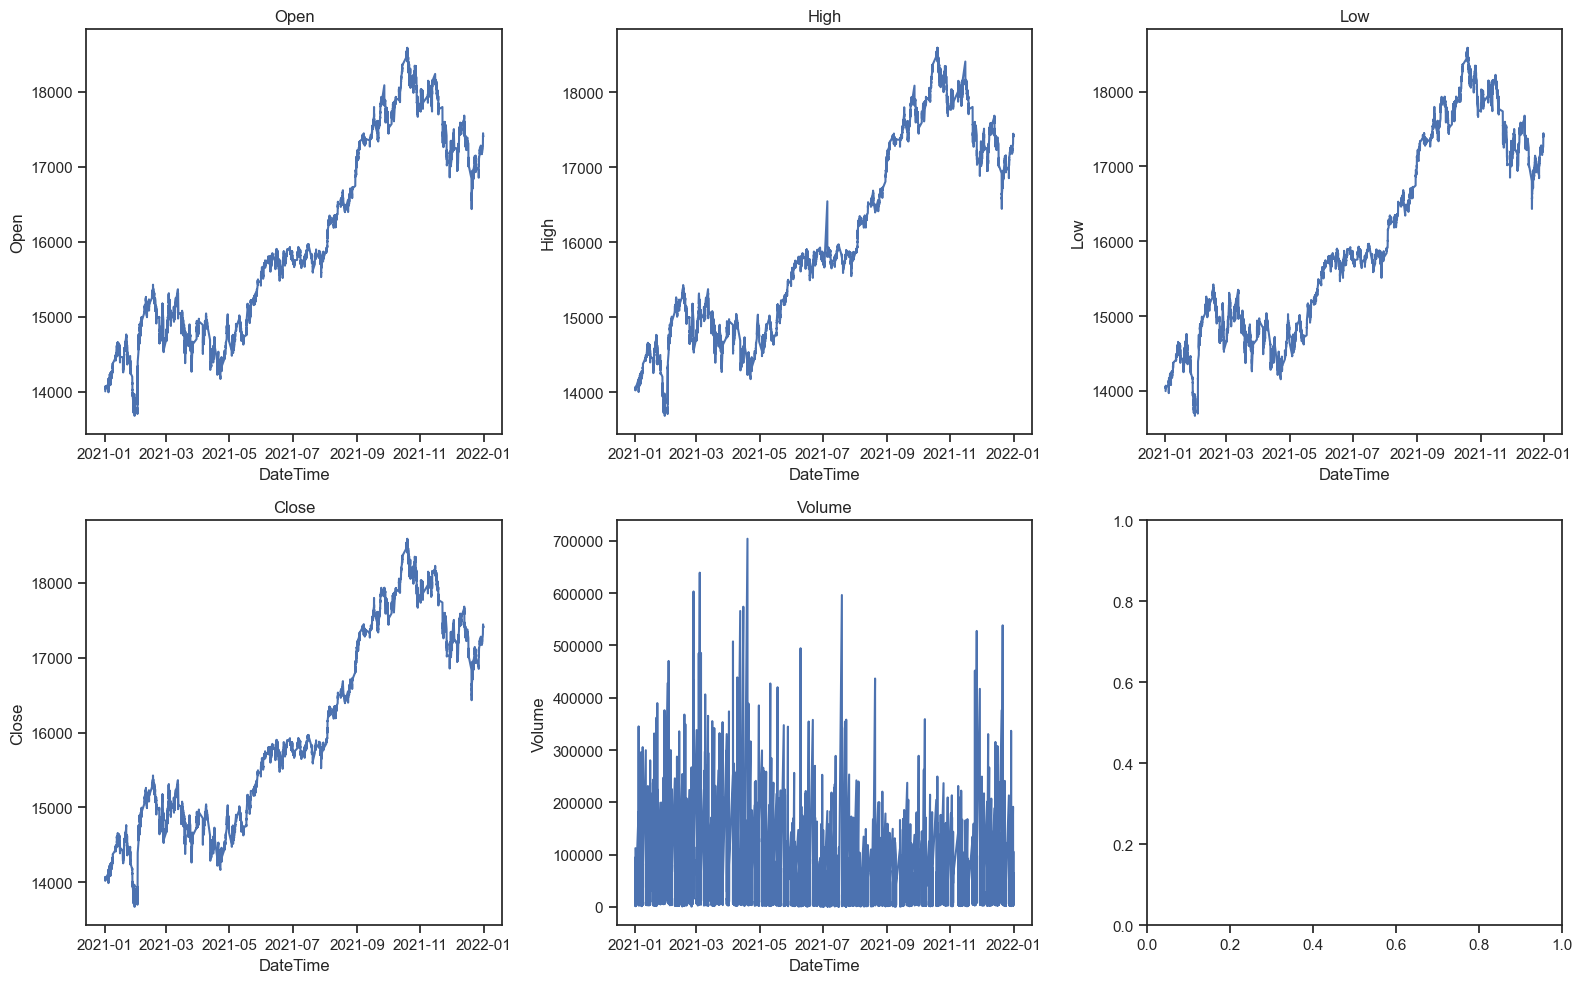

In [13]:
# Plotting using seaborn's styles
sns.set(style='ticks')

# # Plot 1 -4 : Line graph of a Open, High, Low and Close column
line_df = df_raw[['Open', 'High', 'Low', 'Close', 'Volume']]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
axes = axes.flatten()

# Iterate over each column and create a distribution plot
for i, column in enumerate(line_df.columns):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sns.lineplot(data=line_df[column], ax=axes[i])
        axes[i].set_title(column)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

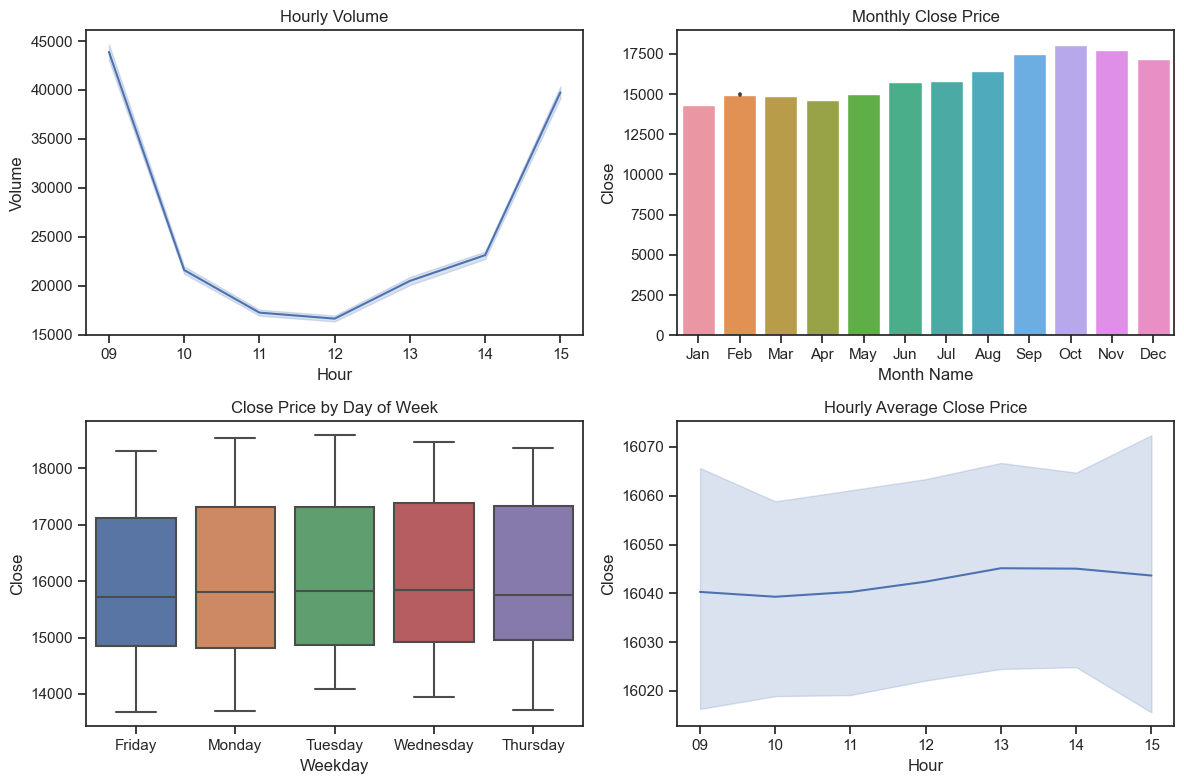

In [15]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    subset_df = df_raw[['Month', 'Month Name', 'Day of Week', 'Weekday', 'Hour', 'Volume', 'Close']]

    # Set up the figure and axes
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    axes = axes.flatten()

    # Plot 1: Line plot for Hour vs. Volume. Showing the variation of Volume over the Hour of the day.
    sns.lineplot(data=subset_df, x='Hour', y='Volume', ax=axes[0])
    axes[0].set_title('Hourly Volume')

    # Plot 2: Bar plot for Month vs. Close. Displaying the average Close price for each Month.
    sns.barplot(data=subset_df, x='Month Name', y='Close', ax=axes[1])
    axes[1].set_title('Monthly Close Price')

    # Plot 3: Box plot for Day of week vs. Close. Visualizing the distribution of Close prices for each Day of the week.
    sns.boxplot(data=subset_df, x='Weekday', y='Close', ax=axes[2])
    axes[2].set_title('Close Price by Day of Week')

    # Plot 4: Line plot for Hour vs. Close (average). Showcasing the average Close price over the Hour of the day.
    sns.lineplot(data=subset_df, x='Hour', y='Close', estimator='mean', ax=axes[3])
    axes[3].set_title('Hourly Average Close Price')

    # Adjust the layout and display the plots
    plt.tight_layout()
    plt.show()

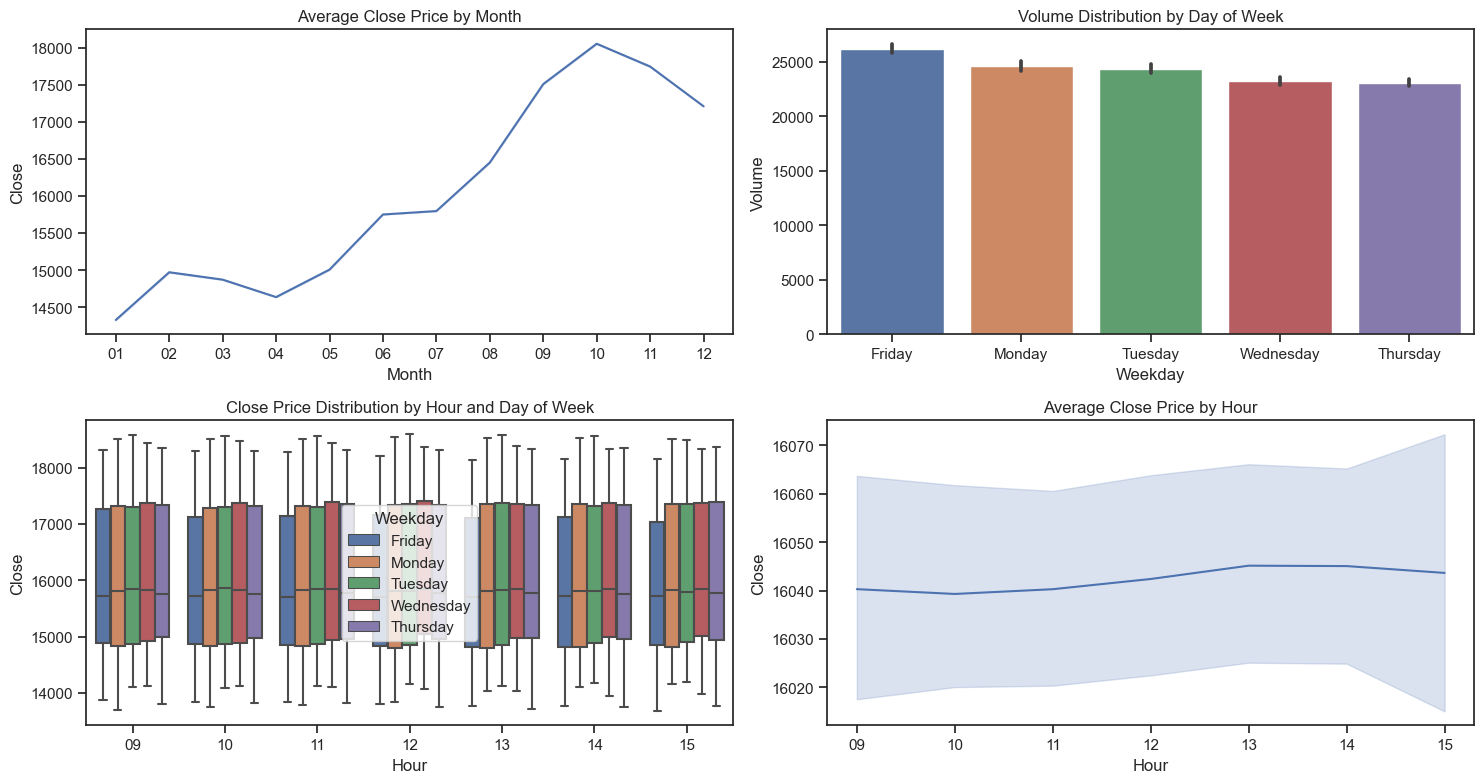

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    subset_df = df_raw[['Month', 'Month Name', 'Day of Week', 'Weekday', 'Hour', 'Volume', 'Close']]

    # Set up the figure and axes
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
    axes = axes.flatten()

    # Plot 1: Line plot for Month vs. Close (average). Showsthe average Close price for each Month. 
    sns.lineplot(data=subset_df, x='Month', y='Close', ax=axes[0])
    axes[0].set_title('Average Close Price by Month')

    # Plot 2: Violin plot for Day of week vs. Volume. Depicts the distribution of Volume for each Day of the week.
    sns.barplot(data=subset_df, x='Weekday', y='Volume', ax=axes[1])
    axes[1].set_title('Volume Distribution by Day of Week')

    # Plot 3: Box plot for Hour vs. Close (grouped by Day of week). Displaying the distribution of Close prices for each Hour, grouped by Day of the week. 
    ### Shows how the close prices vary across different hours of the day and how they compare between different days of the week.
    sns.boxplot(data=subset_df, x='Hour', y='Close', hue='Weekday', ax=axes[2])
    axes[2].set_title('Close Price Distribution by Hour and Day of Week')

    # Plot 4: Line plot for Hour vs. Close (average). Showsthe average Close price for each Month. 
    sns.lineplot(data=subset_df, x='Hour', y='Close', ax=axes[3])
    axes[3].set_title('Average Close Price by Hour')


    # Adjust the layout and display the plots
    plt.tight_layout()
    plt.show()

In [17]:
hourly_volume = df_raw.groupby(['Hour', 'Month'])['Volume'].mean().reset_index()

# Create the line plot using Plotly Express
fig1 = px.line(hourly_volume, x='Hour', y='Volume', color='Month')

# Set the x-axis label
fig1.update_layout(xaxis_title='Hour')

# Set the y-axis label
fig1.update_layout(yaxis_title='Average Volume')

# Set the title of the plot
fig1.update_layout(title='Hourly Volume by Month')

# Display the plot
fig1.show()

###Shows how the average volume varies throughout the different months and how it differs between different hours of the day.

In [18]:
# Group the data by 'Hour' and 'Month' and calculate the average volume
# monthly_volume = df_raw.groupby(['Month Name'])['Volume'].mean().reset_index()
monthly_volume = df_raw.groupby(['Month'])['Volume'].mean().reset_index()

# Create the line plot using Plotly Express
fig2 = px.line(monthly_volume, x='Month', y='Volume')

# Set the x-axis label
fig2.update_layout(xaxis_title='Month')

# Set the y-axis label
fig2.update_layout(yaxis_title='Average Volume')

# Set the title of the plot
fig2.update_layout(title='Volume by Month')

# Display the plot
fig2.show()

In [19]:
# Group the data by hour and calculate the sum of volume
hourly_volume = df_raw.groupby('Hour')['Volume'].mean().reset_index()

# Create the bar chart or line plot using Plotly
fig3 = px.line(hourly_volume, x='Hour', y='Volume')
# Alternatively, you can use a line plot:
# fig = px.line(hourly_volume, x='Hour', y='Volume')

# Set labels and title for the plot
fig3.update_layout(
    xaxis_title='Hour',
    yaxis_title='Volume',
    title='Volume by Hour'
)

# Show the plot
fig3.show()

### Trend - Volume of trades are higher as the stock market opens, goes down during mid day after 10 am until 12 pm. There is a increase in the trades post 12 pm until the market closes.s

In [20]:
# Group the data by 'Month' and calculate the average closing price
monthly_close= df_raw.groupby(['Month'])['Close'].mean().reset_index()

# Create the line plot using Plotly Express
# fig = px.line(hourly_volume, x='Hour', y='Volume', color='Month')
fig4 = px.line(monthly_close, x='Month', y='Close')


# Set the x-axis label
fig4.update_layout(xaxis_title='Month')

# Set the y-axis label
fig4.update_layout(yaxis_title='Closing price')

# Set the title of the plot
fig4.update_layout(title='Closing prices by Month')

# Display the plot
fig4.show()

In [21]:
# Group the data by hour and calculate the average closing price
hourly_avg_close = df_raw.groupby('Hour')['Close'].mean().reset_index()

# Create the bar chart or line plot using Plotly
fig5 = px.line(hourly_avg_close, x='Hour', y='Close')

# Set labels and title for the plot
fig5.update_layout(
    xaxis_title='Hour',
    yaxis_title='Average Close Price',
    title='Average Close Price Across Hours of a Day'
)
fig5.show()

### Trend - Volume of trades are higher as the stock market opens, goes down during mid day after 10 am until 12 pm. There is a increase in the trades post 12 pm until the market closes.s

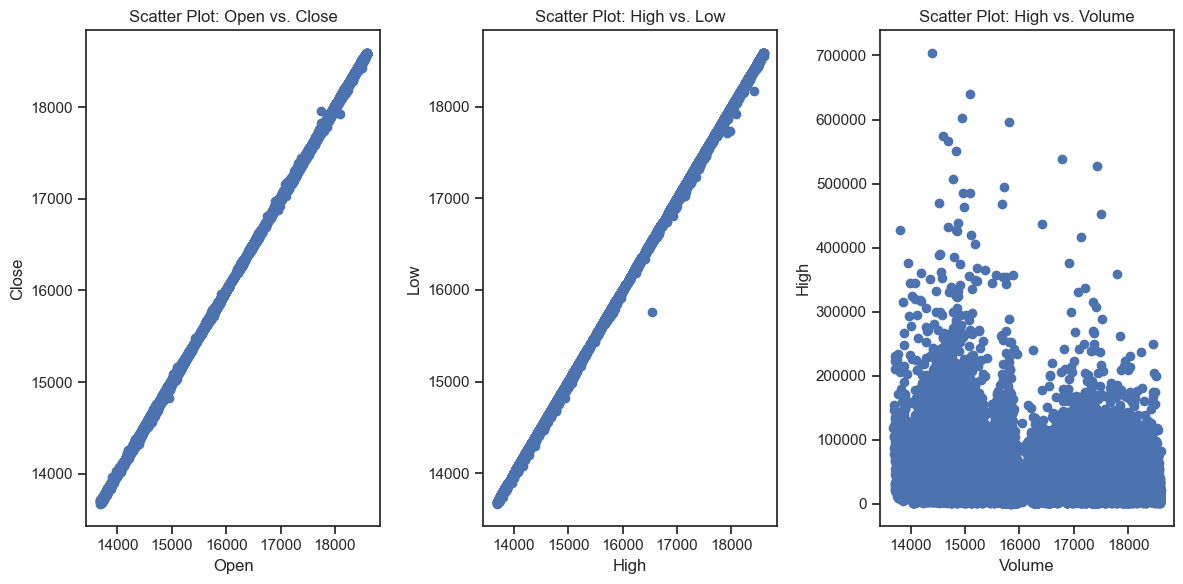

In [22]:
subset_df = df_raw[['Open', 'Close', 'High', 'Low', 'Volume']]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axes = axes.flatten()

# Scatter plot 1: Open vs. Close
axes[0].scatter(subset_df['Open'], subset_df['Close'])
axes[0].set_xlabel('Open')
axes[0].set_ylabel('Close')
axes[0].set_title('Scatter Plot: Open vs. Close')

# Scatter plot 2: High vs. Low
axes[1].scatter(subset_df['High'], subset_df['Low'])
axes[1].set_xlabel('High')
axes[1].set_ylabel('Low')
axes[1].set_title('Scatter Plot: High vs. Low')

# Scatter plot 1: High vs. Volume
axes[2].scatter(subset_df['High'], subset_df['Volume'])
axes[2].set_xlabel('Volume')
axes[2].set_ylabel('High')
axes[2].set_title('Scatter Plot: High vs. Volume')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

## High, Low, Open and close have few outliers when compared to volume. 

In [23]:
df_raw

,Open,High,Low,Close,Volume,Open_Interest,Month,Month Name,Day of Week,Weekday,Hour,Minutes,Week
DateTime,,,,,,,,,,,,,
2021-01-01 09:16:00,14002.1,14032.0,13997.0,14026.8,112275,11800650,01,Jan,5,Friday,09,16,1
2021-01-01 09:17:00,14026.5,14030.0,14021.0,14021.0,58500,11800650,01,Jan,5,Friday,09,17,1
2021-01-01 09:18:00,14021.0,14025.3,14019.1,14025.0,50625,11892750,01,Jan,5,Friday,09,18,1
2021-01-01 09:19:00,14026.0,14030.0,14025.7,14029.8,41775,11892750,01,Jan,5,Friday,09,19,1
2021-01-01 09:20:00,14029.0,14029.3,14023.3,14028.8,24300,11892750,01,Jan,5,Friday,09,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 15:26:00,17413.0,17414.4,17409.3,17412.9,70300,10617950,12,Dec,5,Friday,15,26,53
2021-12-31 15:27:00,17412.9,17414.9,17410.8,17413.7,42500,10617950,12,Dec,5,Friday,15,27,53
2021-12-31 15:28:00,17413.6,17415.0,17412.1,17412.1,91500,10562750,12,Dec,5,Friday,15,28,53


In [24]:
# Select numeric columns
numeric_columns = df_raw.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
cor_matrix = numeric_columns.corr()
# cor_matrix = df_raw.corr()
cor_matrix

,Open,High,Low,Close,Volume,Open_Interest,Week
Open,1.000000,0.999991,0.999993,0.999988,-0.143145,0.089193,0.910881
High,0.999991,1.000000,0.999988,0.999992,-0.141796,0.089091,0.910912
Low,0.999993,0.999988,1.000000,0.999994,-0.144754,0.089318,0.910856
Close,0.999988,0.999992,0.999994,1.000000,-0.143289,0.089225,0.910882
Volume,-0.143145,-0.141796,-0.144754,-0.143289,1.000000,-0.028605,-0.135711
Open_Interest,0.089193,0.089091,0.089318,0.089225,-0.028605,1.000000,-0.049927
Week,0.910881,0.910912,0.910856,0.910882,-0.135711,-0.049927,1.000000


Text(0.5, 1.0, 'Correlation of Variables ')

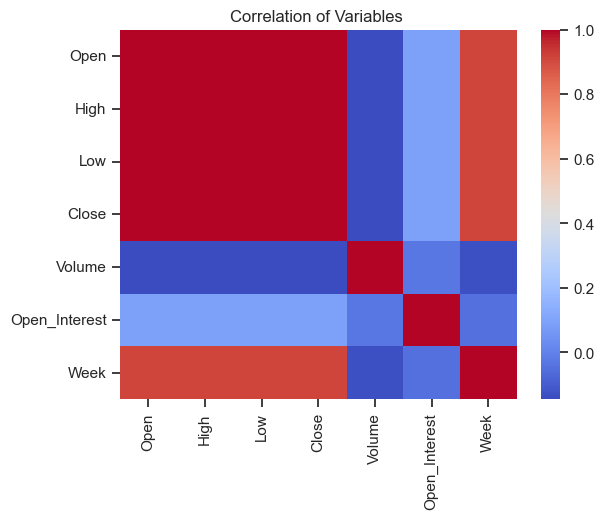

In [25]:
sns.heatmap(cor_matrix , cmap = 'coolwarm' , annot = False)
plt.title('Correlation of Variables ')

### Open, High, Low, Close are highly correlated to each other and has a high correlation with Week. 

In [26]:
# Create the box plot using Plotly
fig = px.box(df_raw, y='Volume')

# Set labels and title for the plot
fig.update_layout(
    yaxis_title='Volume',
    title='Outliers in Volume Column'
)

# Show the plot
fig.show()

In [27]:
df_nifty = df_raw.drop(['Month Name', 'Weekday'], axis=1)
df_nifty = df_nifty.sort_index()
df_nifty

,Open,High,Low,Close,Volume,Open_Interest,Month,Day of Week,Hour,Minutes,Week
DateTime,,,,,,,,,,,
2021-01-01 09:16:00,14002.1,14032.0,13997.0,14026.8,112275,11800650,01,5,09,16,1
2021-01-01 09:17:00,14026.5,14030.0,14021.0,14021.0,58500,11800650,01,5,09,17,1
2021-01-01 09:18:00,14021.0,14025.3,14019.1,14025.0,50625,11892750,01,5,09,18,1
2021-01-01 09:19:00,14026.0,14030.0,14025.7,14029.8,41775,11892750,01,5,09,19,1
2021-01-01 09:20:00,14029.0,14029.3,14023.3,14028.8,24300,11892750,01,5,09,20,1
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 15:26:00,17413.0,17414.4,17409.3,17412.9,70300,10617950,12,5,15,26,53
2021-12-31 15:27:00,17412.9,17414.9,17410.8,17413.7,42500,10617950,12,5,15,27,53
2021-12-31 15:28:00,17413.6,17415.0,17412.1,17412.1,91500,10562750,12,5,15,28,53


##To find what is the highest and lowest price where the trading volume was high.

In [28]:
# Initialize the first row of the new DataFrame with values from the first row of df_nifty
new_df = pd.DataFrame(columns=['High', 'Low', 'Volume'])
new_df.loc[0] = [df_nifty.iloc[0]['High'], df_nifty.iloc[0]['Low'], df_nifty.iloc[0]['Volume']]
new_df

,High,Low,Volume
0,14032.0,13997.0,112275.0


In [29]:
# Loop through the NIFTY dataset to add rows to the new DataFrame
for i in range(1, len(df_nifty)):
    current_high = df_nifty.iloc[i]['High']
    current_low = df_nifty.iloc[i]['Low']
    current_volume = df_nifty.iloc[i]['Volume']

    # Check if the current high value is less than or equal to the previous high value.
    if current_high <= new_df.iloc[-1]['High']:
        # If the conditions are met, add the volume to the previous row in the new DataFrame
        new_df.at[new_df.index[-1], 'Volume'] += current_volume
    else:
        # If the conditions are not met, create a new row in the new DataFrame
        new_df.loc[new_df.index[-1] + 1] = [current_high, current_low, current_volume]

# Reset the index of the new DataFrame
new_df.reset_index(drop=True, inplace=True)

# Print the new DataFrame
new_df

,High,Low,Volume
0,14032.0,13997.0,287475.0
1,14035.5,14021.3,99225.0
2,14035.7,14030.1,196125.0
3,14044.0,14032.8,294075.0
4,14047.8,14040.2,42300.0
...,...,...,...
667,18524.9,18514.0,66250.0
668,18530.8,18522.0,165750.0
669,18534.2,18527.0,32000.0
670,18543.3,18531.9,2720800.0


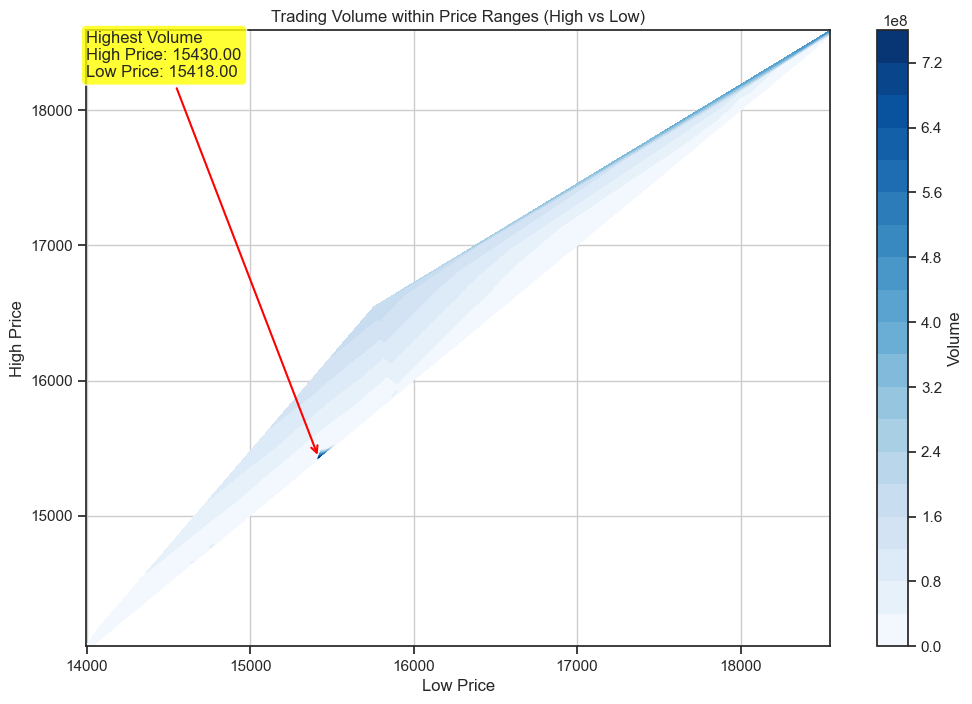

In [30]:
import matplotlib.pyplot as plt
import numpy as np

#Calculate the range of high and low prices
new_df['Price Range'] = new_df['High'] - new_df['Low']

# # Create a contour plot to show the density of trading volume within price ranges
plt.figure(figsize=(12, 8))
plt.tricontourf(new_df['Low'], new_df['High'], new_df['Volume'], levels = 20, cmap='Blues')
plt.colorbar(label = 'Volume')
plt.xlabel('Low Price')
plt.ylabel('High Price')
plt.title('Trading Volume within Price Ranges (High vs Low)')

# Find the coordinates of the point with the highest volume
max_volume_index = new_df['Volume'].idxmax()
max_volume_low = new_df['Low'].loc[max_volume_index]
max_volume_high = new_df['High'].loc[max_volume_index]

# Add annotation with arrow at the top-left corner
arrow_props = dict(arrowstyle='->', color='red', lw=1.5)
annotation = f'Highest Volume\nHigh Price: {max_volume_high:.2f}\nLow Price: {max_volume_low:.2f}'
plt.annotate(annotation,
             xy=(max_volume_low, max_volume_high),
             xytext=(np.min(new_df['Low']) + 0.1, np.max(new_df['High']) - 0.1),
             ha='left', va='top',
             arrowprops=arrow_props,
             bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.8))
plt.grid(True)
plt.show()

